In [25]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from tensorflow.keras import Sequential
from tensorflow.keras import Input
from tensorflow.keras import Model
# from tensorflow.keras.layers import Input,Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import ELU, PReLU, LeakyReLU
# from keras.layers.advanced_activations import LeakyReLU

In [26]:
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [27]:
classes = np.unique(train_Y)
nClasses =len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [28]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [29]:
#Normalisation
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X /255
test_X = test_X /255

In [30]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [31]:
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [32]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [33]:
batch_size =64
epochs =3
num_classes =10
m_model = Sequential()
m_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(
28,28,1),padding='same'))
m_model.add(LeakyReLU(alpha=0.1))
m_model.add(MaxPooling2D((2, 2),padding='same'))

In [34]:
m_model.add(Flatten())
m_model.add(Dense(128, activation='linear'))
m_model.add(LeakyReLU(alpha=0.1)) 
m_model.add(Dense(num_classes, activation='softmax'))
m_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras
.optimizers.Adam(),metrics=['accuracy'])
m_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               802944    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                      

In [35]:
m_train = m_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/3
750/750 [==============================] - 29s 37ms/step - loss: 0.1890 - accuracy: 0.9451 - val_loss: 0.0868 - val_accuracy: 0.9745
Epoch 2/3
750/750 [==============================] - 28s 38ms/step - loss: 0.0629 - accuracy: 0.9813 - val_loss: 0.0663 - val_accuracy: 0.9792
Epoch 3/3
750/750 [==============================] - 28s 37ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0606 - val_accuracy: 0.9831


In [36]:
test_eval = m_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.05057043582201004
Test accuracy: 0.983299970626831


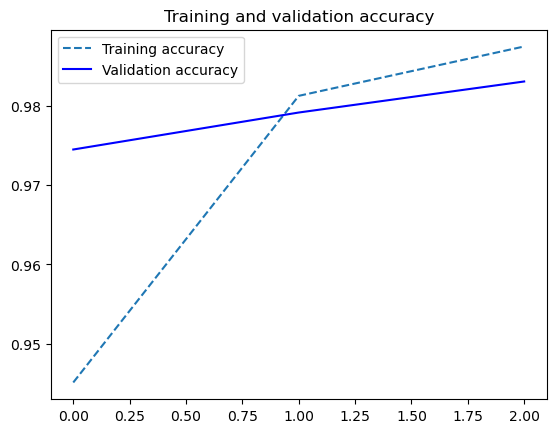

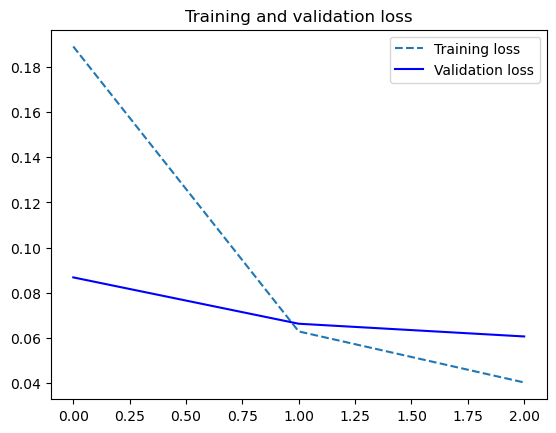

In [37]:
accuracy = m_train.history['accuracy']
val_accuracy = m_train.history['val_accuracy']
loss = m_train.history['loss']
val_loss = m_train.history['val_loss']
epochs =range(len(accuracy))
plt.plot(epochs, accuracy, '--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
epochs=1
# ADDING DROPOUT
m_model = Sequential()
m_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
m_model.add(LeakyReLU(alpha=0.1))
m_model.add(MaxPooling2D((2, 2),padding='same'))
m_model.add(Dropout(0.25))
#fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#fashion_model.add(Dropout(0.25))
#fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1)) 
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#fashion_model.add(Dropout(0.4))
m_model.add(Flatten())
m_model.add(Dense(128, activation='linear'))
m_model.add(LeakyReLU(alpha=0.1)) 
m_model.add(Dropout(0.3))
m_model.add(Dense(num_classes, activation='softmax'))
m_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               802944    
                                                      

In [39]:
m_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
m_train_dropout = m_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

750/750 [==============================] - 35s 45ms/step - loss: 0.2350 - accuracy: 0.9319 - val_loss: 0.0870 - val_accuracy: 0.9732


In [40]:
m_model.save("dropout.h5py")
test_eval = m_model.evaluate(test_X, test_Y_one_hot, verbose=1)


INFO:tensorflow:Assets written to: dropout.h5py\assets


INFO:tensorflow:Assets written to: dropout.h5py\assets


313/313 [==============================] - 3s 10ms/step - loss: 0.0788 - accuracy: 0.9751


In [41]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.07881870120763779
Test accuracy: 0.9750999808311462


In [42]:
predicted_classes = m_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

313/313 [==============================] - 3s 10ms/step


((10000,), (10000,))

Found 9711 correct labels


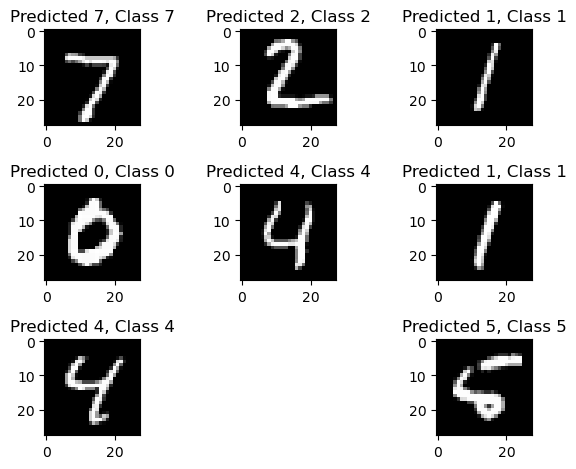

In [43]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels"%len(correct))
for i, correct in enumerate(correct[:9]):
 plt.subplot(3,3,i+1)
 plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
 plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
 plt.tight_layout()